In [5]:
!pip install -qq --upgrade transformers accelerate diffusers
!rm -r sample_data
# Set the details for your model here:
import torch

from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline, AutoencoderKL, KDPM2AncestralDiscreteScheduler

common = {
    'torch_dtype': torch.float16,
    'variant': 'fp16',
    'use_safetensors': True,
    'add_watermarker': False,
}

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
base = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    **common
)

base2 = StableDiffusionXLImg2ImgPipeline(**base.components)

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0",
    vae=vae,
    text_encoder_2=base.text_encoder_2,
    **common
)

_ = base.to("cuda")
_ = base2.to("cuda")
_ = refiner.to("cuda")

rm: cannot remove 'sample_data': No such file or directory


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

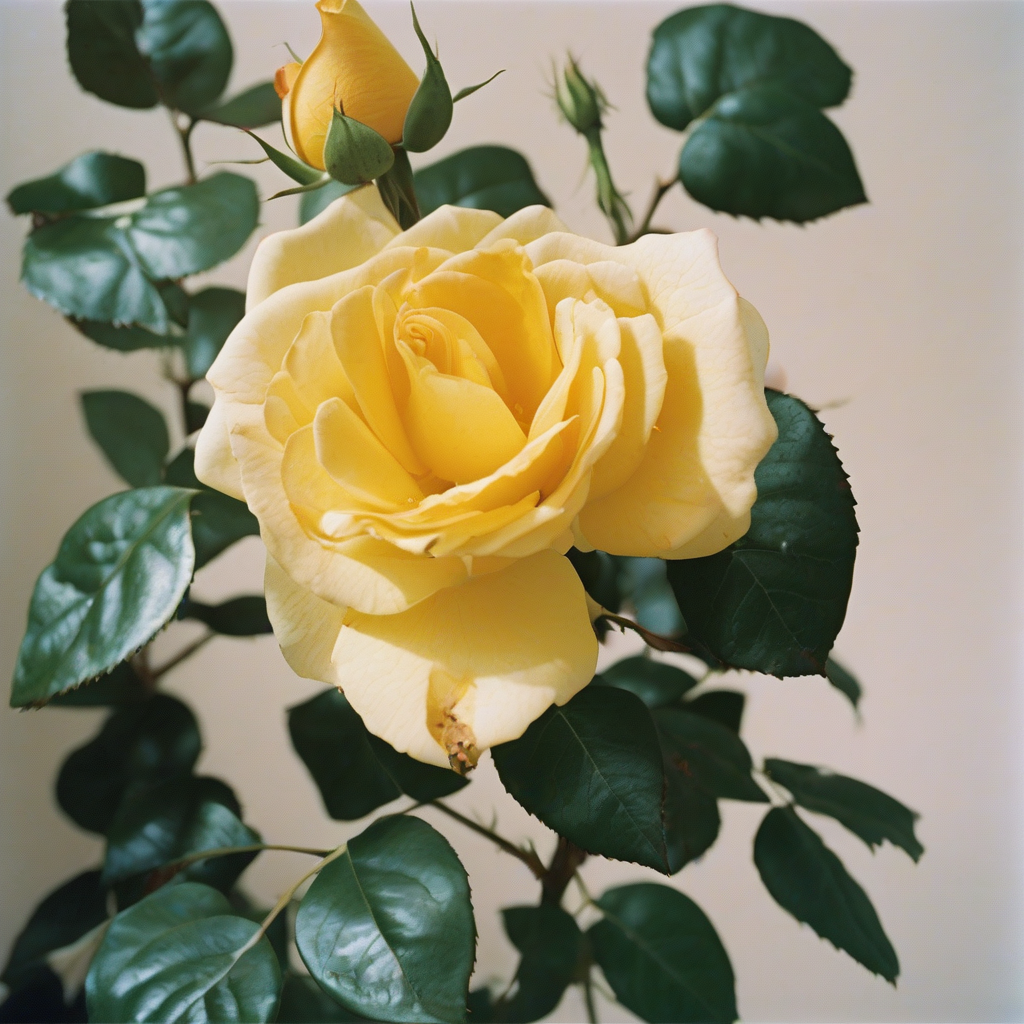

  0%|          | 0/19 [00:00<?, ?it/s]

tensor([[[-1.3828, -1.4971, -0.9473,  ...,  1.1719,  1.0684,  1.2949],
         [-0.8755, -0.4333, -0.6143,  ...,  0.9297,  0.8154,  0.8965],
         [ 0.1310, -0.2561, -0.2081,  ...,  0.8369,  0.6812,  1.0977],
         ...,
         [-1.5684, -1.0547, -1.9170,  ...,  0.6006,  0.8174,  0.9272],
         [-1.7510, -1.3008, -1.7109,  ...,  0.8350,  0.7817,  0.8813],
         [-1.2520, -1.8418, -1.2129,  ...,  0.9873,  0.7598,  1.0010]],

        [[ 0.4053,  0.0455,  0.5410,  ...,  0.4207,  0.3374,  0.3862],
         [ 0.0170,  1.6348,  1.0654,  ...,  0.2671,  0.1354,  0.0975],
         [ 0.1758,  0.1697,  0.2008,  ..., -0.1936,  0.1827,  0.5913],
         ...,
         [ 0.1688,  0.9897,  0.0585,  ...,  0.2703,  0.6479,  0.7319],
         [ 0.3997,  0.7402,  0.1140,  ...,  0.6572,  0.8647,  0.7251],
         [ 0.7290,  0.0232,  0.7222,  ...,  0.6851,  0.2893,  0.6787]],

        [[-0.7617, -0.1594,  0.0854,  ...,  0.0036, -0.5259,  0.6367],
         [-0.3455, -0.3992, -0.6333,  ..., -0

  0%|          | 0/7 [00:00<?, ?it/s]

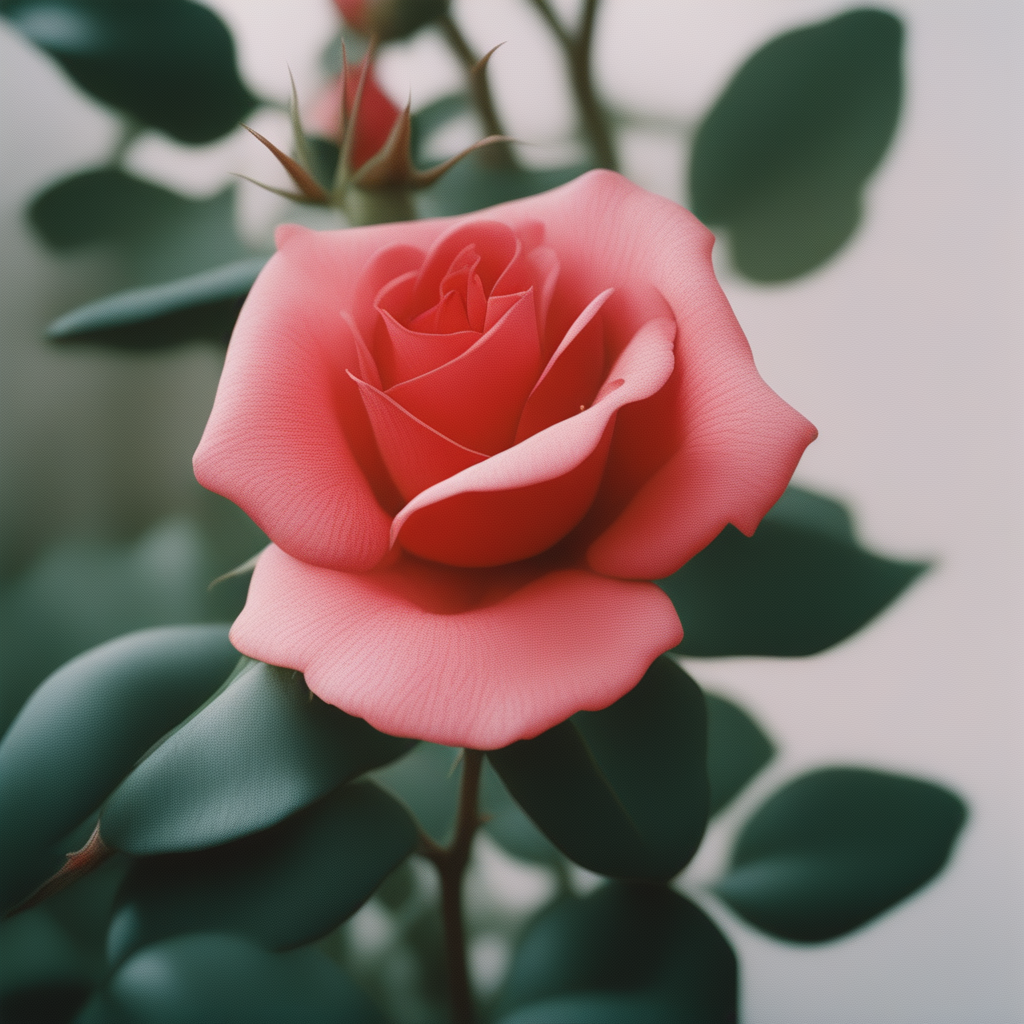

In [19]:
negative_prompt = "blur image, blurred, blurry, bokeh, blur"
image = base("portra 400 photograph a yellow rose", negative_prompt=negative_prompt, num_inference_steps=20, guidance_scale=8).images
display(image[0])
image = base2("portra 400 photograph a red rose", negative_prompt=negative_prompt, num_inference_steps=20, guidance_scale=8, image=image, strength=0.99, output_type="latent").images
display(image[0])
image = refiner("portra 400 photograph a red rose", negative_prompt=negative_prompt, num_inference_steps=30, guidance_scale=8, image=image, denoising_start=0.8).images
display(image[0])